In [4]:
import pandas as pd
from matplotlib import pyplot as plt

taco_data = pd.read_csv("./just tacos and burritos.csv") 
cols = [c for c in taco_data.columns if c.lower()[0:7] != ('unnamed')]

taco_data=taco_data[taco_data['country'].str.contains('US')]


taco_data =  taco_data[["city","country", "menus.currency", "menus.name", "province"]]
taco_data['menus.currency'] = "USD"
taco_data['menus.name'] = taco_data["menus.name"].str.lower()
taco_data['province'] = taco_data["province"].str.upper()

# SEPERATE TACOS AND BURRITOS
# tacos = taco_data[taco_data["menus.name"].str.contains("taco")]
burritos = taco_data[taco_data["menus.name"].str.contains("burrito", case=False)]

# USE STATE ABBREVS
# tacos = tacos[tacos["province"].str.len() == 2]
burritos = burritos[burritos["province"].str.len() == 2]
burritos = burritos[burritos['province'] != 'LS']
burritos = burritos[burritos['province'] != 'VI']
burritos = burritos[burritos['province'] != 'DC']

burritos

,city,country,menus.currency,menus.name,province
15,Albuquerque,US,USD,mondo veggie burrito,NM
16,Albuquerque,US,USD,tofu burrito,NM
17,Albuquerque,US,USD,black bean burrito,NM
20,Detroit,US,USD,sausage burrito,MI
26,Oakland,US,USD,super shrimp burrito,CA
27,Oakland,US,USD,regular shrimp burrito,CA
28,Oakland,US,USD,wet burrito plate,CA
29,Oakland,US,USD,super fish burrito,CA
30,Oakland,US,USD,super wet burrito,CA
31,Oakland,US,USD,burrito plate,CA


In [6]:
south = ['CA', 'NV', 'UT', 'AZ', 'CO', 'NM', 'KS', 'OK', 'TX', 'AR', 'LA', 'HI', 'TN', 'MS', 'AL', 'GA', 'FL', 'SC', 'NC']


north_burrito = burritos[~burritos['province'].isin(south)]
south_burrito = burritos[burritos['province'].isin(south)]

print(north_burrito.shape)
print(south_burrito.shape)

(9991, 5)
(21589, 5)


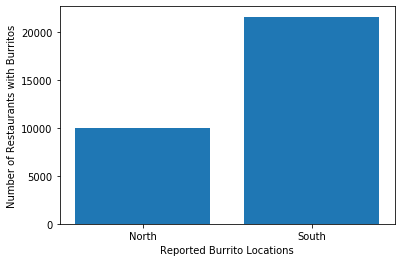

In [8]:
x = ["North", "South"]
nums = [len(north_burrito), len(south_burrito)]
plt.bar(x, nums)
plt.xlabel("Reported Burrito Locations")
plt.ylabel("Number of Restaurants with Burritos")
plt.show()